In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from plotnine import *
from datetime import datetime, time
import numpy as np
from mizani.breaks import date_breaks
from mizani.formatters import date_format

In [39]:
def dep_airport_median_price(df, city):
    #Extract relevant columns: Departure Date/Time, Departure Airport, and Price
    df_airport_price = df[['depFlight_departure','depFlight_origin.name', 'price_amount']].copy()
    df_airport_price['depFlight_origin.name'] = df_airport_price['depFlight_origin.name'].str.replace(' ', '')

    #Keep only Departure Month from Departure Date/Time Column
    #Rename columns
    df_airport_price['departure month'] = pd.DatetimeIndex(df_airport_price['depFlight_departure']).month
    df_airport_price.drop(['depFlight_departure'], axis = 1, inplace = True)
    df_airport_price.rename(columns = {'depFlight_origin.name': 'airport', 'price_amount': 'price'}, inplace = True)

    #Group dataframe by Departure Airport
    #Create dictionary with: key = each unique airport, value = all flights departing from the airport
    df_grouped = df_airport_price.groupby('airport')
    dict_grouped = {name: group for name, group in df_grouped}

    airport_data = {}
    #Assign each airport's dataframe to a new variable
    for name, df in dict_grouped.items():
        var_name = f"{name}_data"
        airport_data[name] = df

    #Find the median price to fly from each airport in each month
    median_prices = {}
    for airport, data in airport_data.items():
        median_prices[airport] = data.groupby('departure month')['price'].median().tolist()

    #Create new dataframe with 'Month' column
    df_monthly_airport_price = pd.DataFrame({'month': ['June', 'July', 'August', 'September'], **median_prices})

    print(df_monthly_airport_price)

    df_monthly_airport_price = df_monthly_airport_price.melt(id_vars='month', var_name='keys', value_name='values')

    month_order = ['June', 'July', 'August', 'September']
    df_monthly_airport_price['month'] = pd.Categorical(df_monthly_airport_price['month'], categories=month_order, ordered=True)

    #Plot line graph
    print(ggplot(data=df_monthly_airport_price, mapping=aes(x='month', y='values', group='keys', color='keys')) +\
        geom_line() +\
        geom_point() +\
        labs(x='Month', y='Departure Flight Price', title=('Median Flight Price per Month for each Departure Airport: ' + city)))

In [40]:
def dep_airport_min_price(df, city):
    #Extract relevant columns: Departure Date/Time, Departure Airport, and Price
    df_airport_price = df[['depFlight_departure','depFlight_origin.name', 'price_amount']].copy()
    df_airport_price['depFlight_origin.name'] = df_airport_price['depFlight_origin.name'].str.replace(' ', '')

    #Keep only Departure Month from Departure Date/Time Column
    #Rename columns
    df_airport_price['departure month'] = pd.DatetimeIndex(df_airport_price['depFlight_departure']).month
    df_airport_price.drop(['depFlight_departure'], axis = 1, inplace = True)
    df_airport_price.rename(columns = {'depFlight_origin.name': 'airport', 'price_amount': 'price'}, inplace = True)

    #Group dataframe by Departure Airport
    #Create dictionary with: key = each unique airport, value = all flights departing from the airport
    df_grouped = df_airport_price.groupby('airport')
    dict_grouped = {name: group for name, group in df_grouped}

    airport_data = {}
    #Assign each airport's dataframe to a new variable
    for name, df in dict_grouped.items():
        var_name = f"{name}_data"
        airport_data[name] = df

    #Find the median price to fly from each airport in each month
    min_prices = {}
    for airport, data in airport_data.items():
        min_prices[airport] = data.groupby('departure month')['price'].min().tolist()

    #Create new dataframe with 'Month' column
    df_monthly_airport_price = pd.DataFrame({'month': ['June', 'July', 'August', 'September'], **min_prices})

    print(df_monthly_airport_price)

    df_monthly_airport_price = df_monthly_airport_price.melt(id_vars='month', var_name='keys', value_name='values')

    month_order = ['June', 'July', 'August', 'September']
    df_monthly_airport_price['month'] = pd.Categorical(df_monthly_airport_price['month'], categories=month_order, ordered=True)

    #Plot line graph
    print(ggplot(data=df_monthly_airport_price, mapping=aes(x='month', y='values', group='keys', color='keys')) +\
        geom_line() +\
        geom_point() +\
        labs(x='Month', y='Departure Flight Price', title=('Minimum Flight Price per Month for each Departure Airport: ' + city)))

Berlin Analysis

In [57]:
df_berlin = pd.read_csv("../dep_flights/depFlights_0320/berlin_0320.csv")

       month  LondonCity  LondonGatwick  LondonHeathrow  LondonLuton  \
0       June      115.52         79.780          159.73       56.990   
1       July      145.02        138.990          180.58       90.490   
2     August      111.52         80.905          175.58       72.685   
3  September       98.52         67.990          137.08       65.990   

   LondonStansted  
0           64.90  
1           94.73  
2           66.90  
3           47.50  


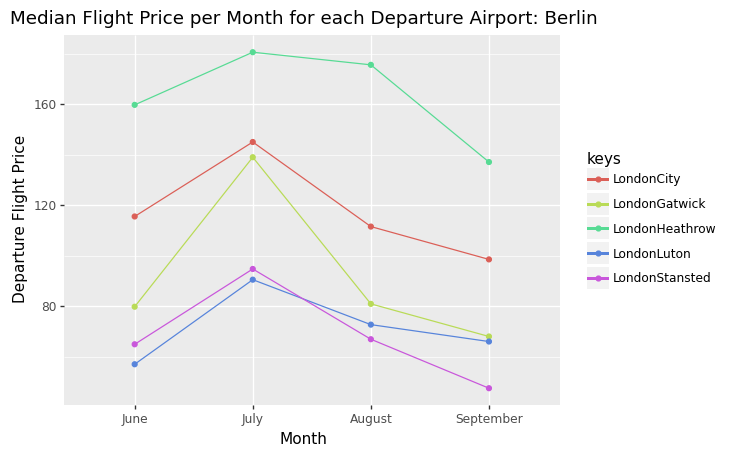

In [59]:
dep_airport_median_price(df_berlin, 'Berlin')

       month  LondonCity  LondonGatwick  LondonHeathrow  LondonLuton  \
0       June      101.52          39.89           89.58        50.38   
1       July      105.52          67.99          139.58        73.99   
2     August       95.52          58.99          125.58        58.99   
3  September       78.52          40.99           94.58        54.99   

   LondonStansted  
0            36.4  
1            65.8  
2            47.5  
3            36.1  


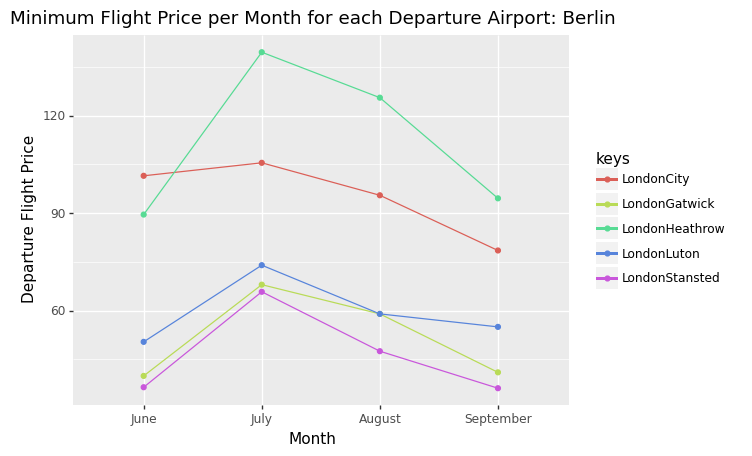

In [58]:
dep_airport_min_price(df_berlin, 'Berlin')

Athens Analysis

In [60]:
df_athens = pd.read_csv("../dep_flights/depFlights_0320/athens_0320.csv")

       month  LondonGatwick  LondonHeathrow  LondonLuton  LondonStansted
0       June         164.99         309.400        135.7           193.9
1       July         249.49         331.680        227.3           233.0
2     August         164.99         252.600        171.9           156.9
3  September          80.99         186.635        139.1           128.9


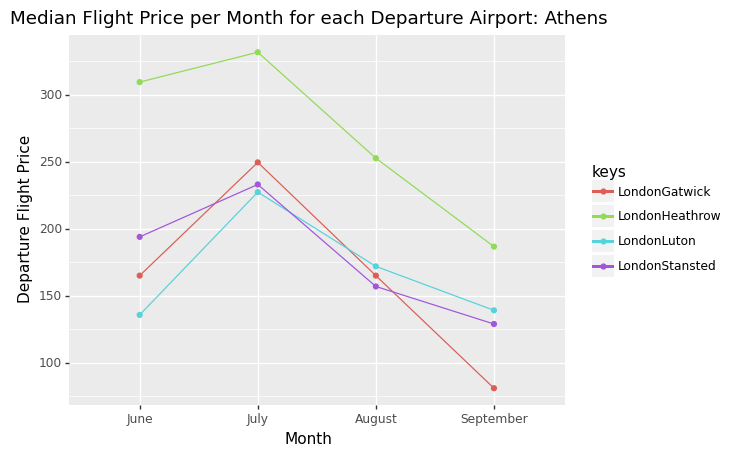

In [61]:
dep_airport_median_price(df_athens, 'Athens')

       month  LondonGatwick  LondonHeathrow  LondonLuton  LondonStansted
0       June          63.18          130.90         79.9           162.9
1       July          63.18          200.99        178.9           174.9
2     August          63.00          106.88        129.9           128.9
3  September          45.99           69.98         95.0            69.0


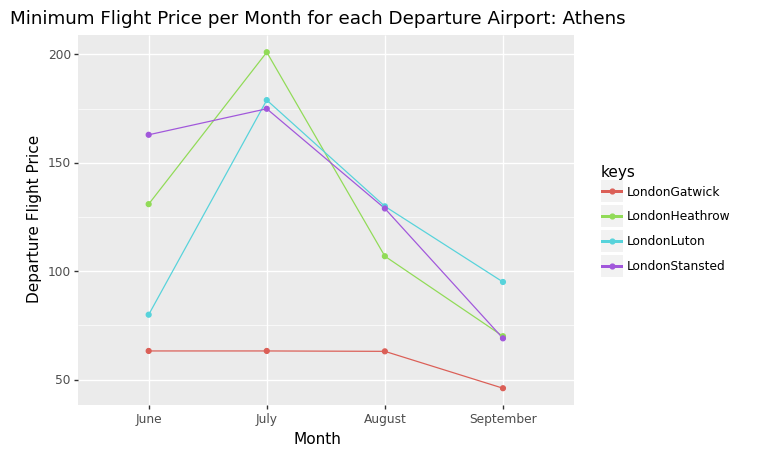

In [62]:
dep_airport_min_price(df_athens, 'Athens')

Budapest Analysis

In [63]:
df_budapest = pd.read_csv("../dep_flights/depFlights_0320/budapest_0320.csv")

       month  LondonGatwick  LondonHeathrow  LondonLuton  LondonStansted
0       June        128.900          223.68       142.90         118.800
1       July        163.695          228.68       155.45         169.550
2     August        159.945          208.79       182.10         133.900
3  September        104.990          223.68       142.50          80.915


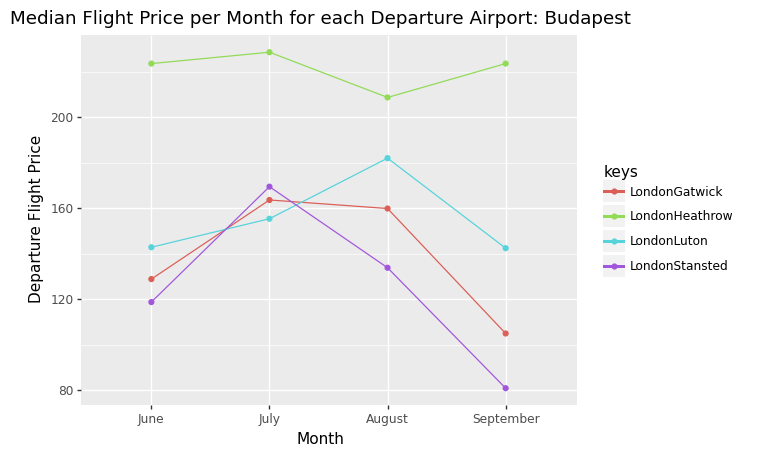

In [64]:
dep_airport_median_price(df_budapest, 'Budapest')

       month  LondonGatwick  LondonHeathrow  LondonLuton  LondonStansted
0       June         106.90           86.68         70.8            68.9
1       July         124.99           86.68         88.9           109.9
2     August          95.99          129.68        115.9            96.9
3  September          57.99           84.87         79.9            56.2


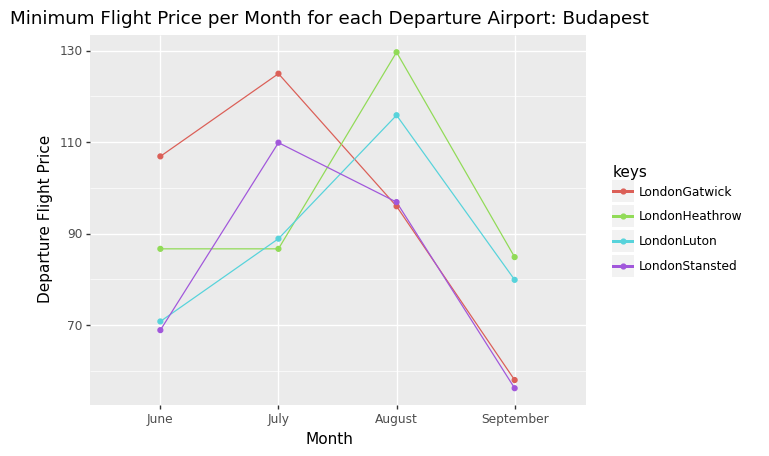

In [65]:
dep_airport_min_price(df_budapest, 'Budapest')

Lisbon Analysis

In [55]:
df_lisbon = pd.read_csv("../dep_flights/depFlights_0320/lisbon_0320.csv")

       month  LondonGatwick  LondonHeathrow  LondonLuton  LondonStansted
0       June         216.69         262.990      138.710         123.550
1       July         224.99         263.490      181.445         138.650
2     August         120.64         149.645       88.990          54.700
3  September         128.49         128.990       74.945          82.545


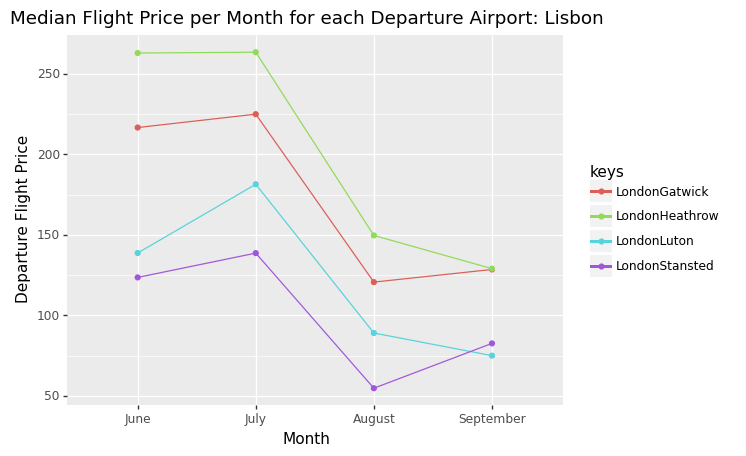

In [56]:
dep_airport_median_price(df_lisbon, 'Lisbon')

       month  LondonGatwick  LondonHeathrow  LondonLuton  LondonStansted
0       June         114.99          129.99         52.9            81.2
1       July         122.99          116.99         79.9            95.7
2     August          86.99          105.99         38.0            20.3
3  September          48.99           72.99         34.9            47.0


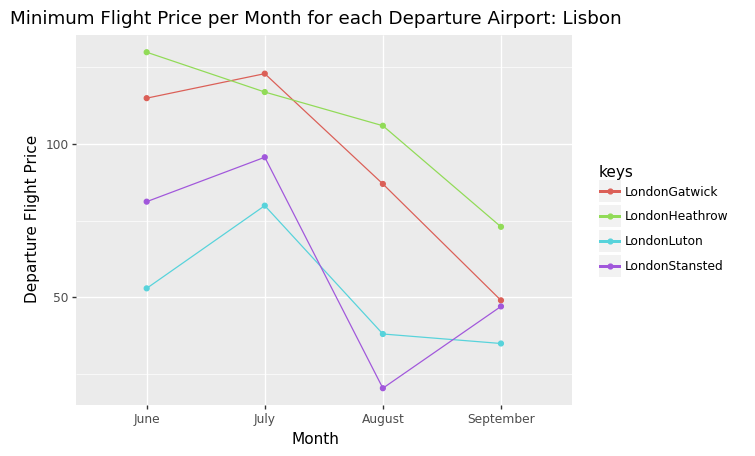

In [66]:
dep_airport_min_price(df_lisbon, 'Lisbon')

Madrid Analysis

In [68]:
df_madrid = pd.read_csv("../dep_flights/depFlights_0320/madrid_0320.csv")

       month  LondonGatwick  LondonHeathrow  LondonStansted
0       June        142.840          250.58            97.0
1       July        226.110          282.18           165.5
2     August        126.870          154.00            70.0
3  September        102.495          154.00            68.0


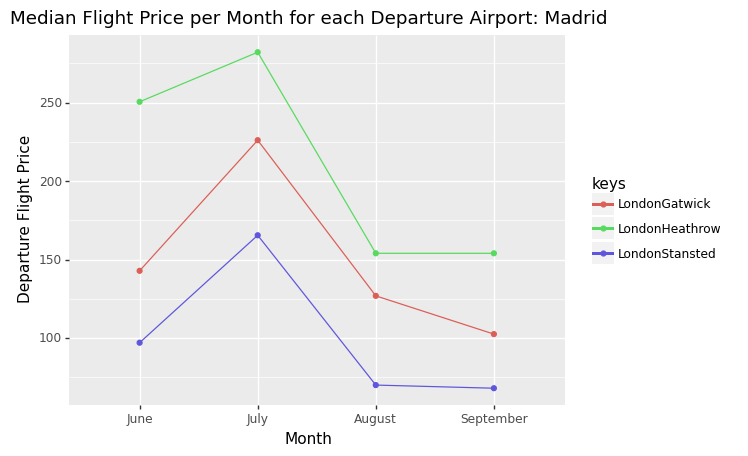

In [69]:
dep_airport_median_price(df_madrid, 'Madrid')

       month  LondonGatwick  LondonHeathrow  LondonStansted
0       June          87.56           66.00           47.00
1       July         102.99          192.91           68.00
2     August          67.99          115.50           37.24
3  September          30.99           66.00           40.00


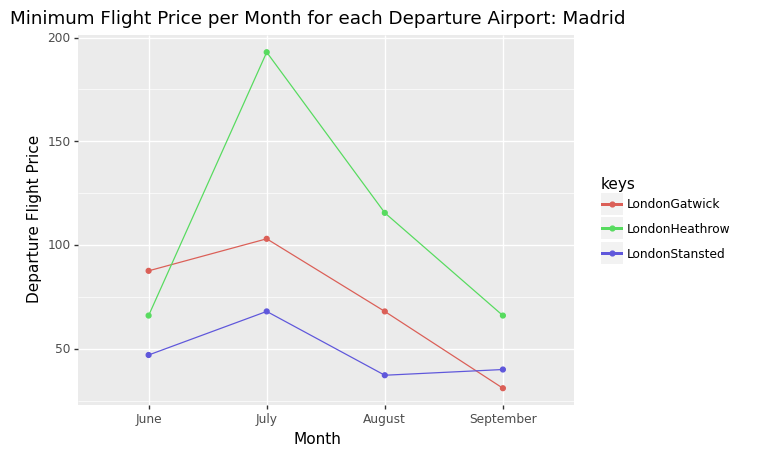

In [70]:
dep_airport_min_price(df_madrid, 'Madrid')

Paris Analysis

In [71]:
df_paris = pd.read_csv("../dep_flights/depFlights_0320/paris_0320.csv")

       month  LondonGatwick  LondonHeathrow  LondonLuton
0       June         67.485          172.15        61.99
1       July         72.090          172.00        69.69
2     August         65.290          141.84        59.99
3  September         67.180          218.88        56.99


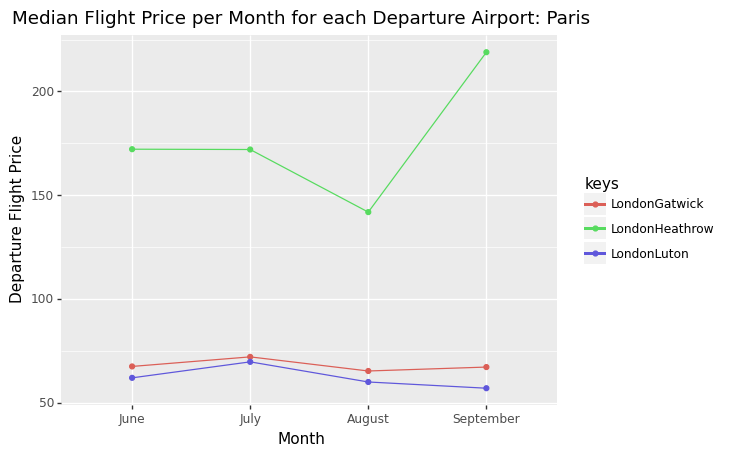

In [73]:
dep_airport_median_price(df_paris, 'Paris')

       month  LondonGatwick  LondonHeathrow  LondonLuton
0       June          36.99           73.78        40.99
1       July          36.61           90.68        37.99
2     August          34.99           64.88        37.99
3  September          37.79           51.88        35.99


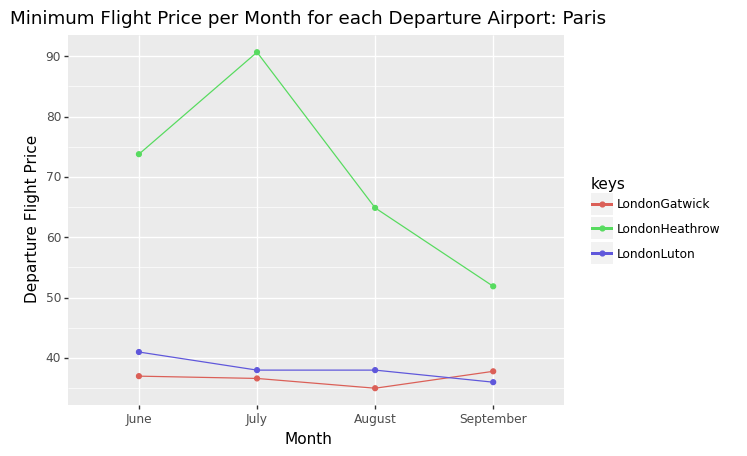

In [75]:
dep_airport_min_price(df_paris, 'Paris')

Rome Analysis

In [76]:
df_rome = pd.read_csv("../dep_flights/depFlights_0320/rome_0320.csv")

       month  LondonGatwick  LondonHeathrow  LondonStansted
0       June        159.990          260.88          127.90
1       July        180.635          293.68          162.45
2     August        159.490          230.79          139.95
3  September        122.990          211.29          102.00


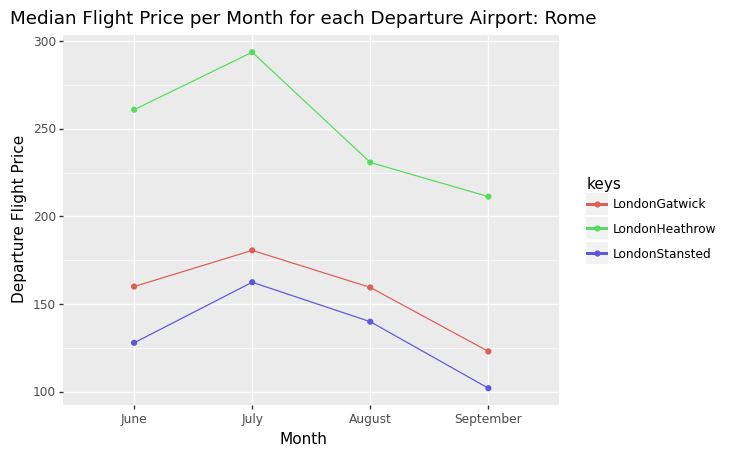

In [77]:
dep_airport_median_price(df_rome, 'Rome')

       month  LondonGatwick  LondonHeathrow  LondonStansted
0       June          50.90          118.99           85.00
1       July          53.99          123.99          112.50
2     August          61.90          123.99          104.00
3  September          52.00           72.88           75.09


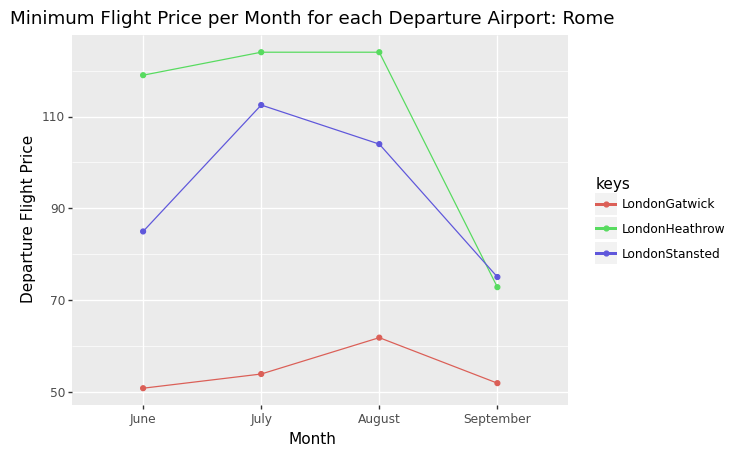

In [78]:
dep_airport_min_price(df_rome, 'Rome')